In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from perceptron import Perceptron

In [ ]:
def create_dataset(n):
    x=np.empty((0,2))
    y=np.empty(0)
    for i in range(n):
        example=np.random.random(2)
        if example[0]>example[1]:
            y=np.append(y,1)
        else:
            y=np.append(y,-1)
        x=np.append(x, np.array([example]), axis=0)
    return x, y

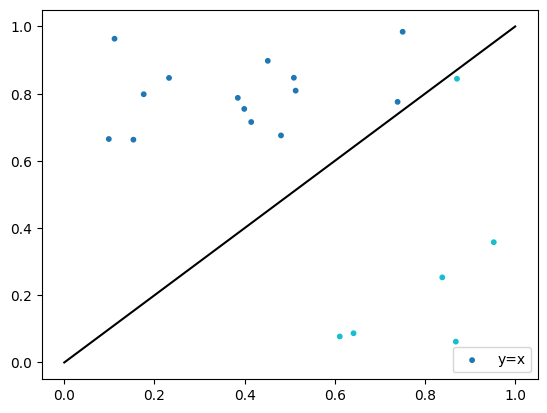

In [ ]:
x_train, y_train=create_dataset(20)
plt.figure()
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='tab10', s=10)  # punti colorati
plt.plot([0,1], [0,1], 'k-', label='y=x')                            # retta nera
plt.legend(['y=x'])

In [ ]:
p_no_hinge=Perceptron(x_train=x_train, y_train=y_train)
p_no_hinge.train()

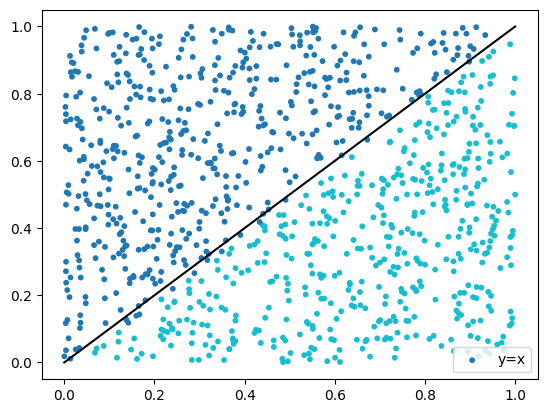

Perpectron has accuracy of 0.972


In [ ]:
x_test, y_test=create_dataset(1000)
y_test_predict=p_no_hinge.predict_more(x_test)
n_error=p_no_hinge.test_sample(x_sample=x_test,y_sample=y_test)
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=y_test_predict, cmap='tab10', s=10)  # punti colorati
plt.plot([0,1], [0,1], 'k-', label='y=x')                            # retta nera
plt.legend(['y=x'])
plt.show()
print("Perpectron has accuracy of",(y_test.shape[0]-n_error)/y_test.shape[0])

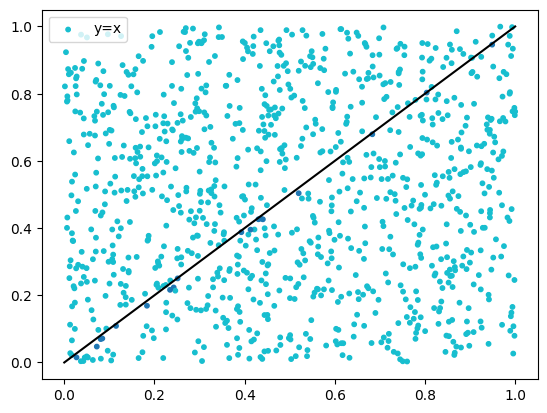

Perpectron has accuracy of 0.964


In [ ]:
x_test, y_test=create_dataset(1000)
y_test_predict=p_no_hinge.predict_more(x_test)
n_error=p_no_hinge.test_sample(x_sample=x_test,y_sample=y_test)
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=np.multiply(y_test_predict, y_test), cmap='tab10', s=10)  # punti colorati
plt.plot([0,1], [0,1], 'k-', label='y=x')                            # retta nera
plt.legend(['y=x'])
plt.show()
print("Perpectron has accuracy of",(y_test.shape[0]-n_error)/y_test.shape[0])

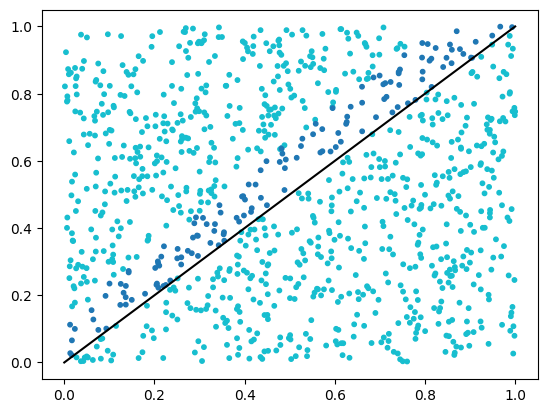

Perpectron makes a wrong prediciton 274.0 -times and it has accuracy of 0.726


In [ ]:
p_hinge=Perceptron(x_train=x_train, y_train=y_train)
p_hinge.train(hinge=True)
y_test_predict_hinge=p_hinge.predict_more(x_test)
n_error=p_hinge.test_sample(x_sample=x_test,y_sample=y_test)
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=np.multiply(y_test_predict_hinge, y_test), cmap='tab10', s=10)  # punti colorati
plt.plot([0,1], [0,1], 'k-')  
plt.show()
print("Perpectron makes a wrong prediciton" ,n_error,"-times and it has accuracy of",(y_test.shape[0]-n_error)/y_test.shape[0])